In [42]:
import tclab
from tclab import Plotter, clock, Historian

import numpy as np

import random

import tbcontrol
from tbcontrol import blocksim

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

Kp, τp, θp, To_p = 0.6423177737615754, 150.3121523254063, 17.396993066317368, 57.79957014481422
parameters = Kp, τp, θp
# G1 = Kp*np.exp(-θp*s)/(τp*s + 1)

NameError: name 's' is not defined

In [28]:
test1 = 0
test2 = 0
test3 = 0
wait = 50

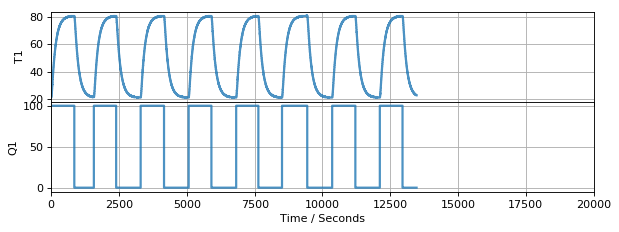

In [ ]:
TCLab = tclab.setup(connected=False, speedup=10)

with TCLab() as lab:
    Tsp = lab.T1
    Tap = lab.T1
    sources = [('T1', lambda: lab.T1),
               ('Q1', lambda: lab.U1)]
    h = tclab.Historian(sources)
    p = Plotter(h, 20000)
    Q1 = lab.Q1(100)
    for t in clock(20000):
        test1 += 1
        test2 += 1
        if test1 > 2:
            Tap = lab.T1
            test1 = 0
        if test2 > wait:
            e = abs(Tsp - Tap)
            if e < 0.1:
                if test3 == 0:
                    Q1 = lab.Q1(0)
                    test3 = 1
                else:
                    Q1 = lab.Q1(100)
                    test3 = 0
                Tsp = Tap                
                wait = 50*(1+random.random())
            test2 = 0
            Tsp = lab.T1
        h.update(t) 
        p.update(t)     
        Tap = lab.T1
    h.get_sessions()
    h.load_session(1)
    df = pd.DataFrame({h.columns[0]:h.fields[0],
                     h.columns[1]:h.fields[1],
                     h.columns[2]:h.fields[2]})
    df.to_csv(str('freq3'),index=False)

In [72]:
ω1 = 5*np.logspace(-4, -2, 6)
ω = np.logspace(-6, 0, 100)
s = ω*1j
Kp, τp, θp, To_p = 0.6423177737615754, 150.3121523254063, 17.396993066317368, 57.79957014481422
G1 = Kp*np.exp(-θp*s)/(τp*s + 1)

In [73]:
Qd = data.Q1
Td = data.T1
td = data.Time
fft_rfft = np.fft.rfft(Td)
fft_rfft_freq = np.fft.rfftfreq(len(Td))
abso = np.abs(fft_rfft)

(-100, 100)

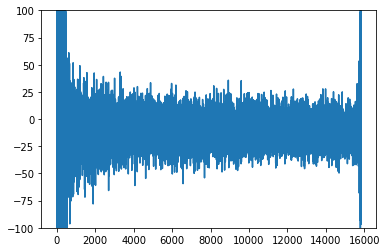

In [74]:
# plt.plot(Td)
plt.plot(fft_rfft)
plt.ylim(-100,100)

In [75]:
def Bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(ω, np.abs(G))
    ax_mag.loglog(fft_rfft_freq, np.abs(fft_rfft))
    ax_phase.semilogx(ω, np.unwrap(np.angle(G)))
    plt.show()

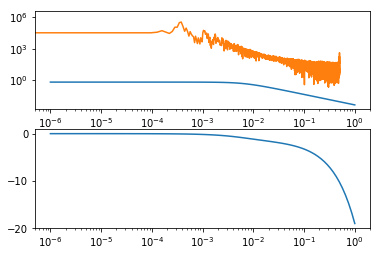

In [76]:
Bode(G1)